## Polynomial Fit of Rotational Low Noise Model

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Load Data

In [2]:
path = "/home/andbro/kilauea-data/LNM/data/MODELS/"
file = "rlnm_theory.pkl"

model = pd.read_pickle(open(path+file, "rb"))
model

,Unnamed: 0,period,rlnm_psd_median,rlnm_psd_maximum,rlnm_psd_upper,rlnm_psd_lower
0,0,199.52600,1.249680e-26,1.253644e-26,1.233495e-26,1.266186e-26
1,1,196.78900,1.272067e-26,1.274470e-26,1.255268e-26,1.289206e-26
2,2,194.08900,1.294465e-26,1.295262e-26,1.277043e-26,1.312246e-26
3,3,191.42600,1.317465e-26,1.316614e-26,1.299403e-26,1.335907e-26
4,4,188.79900,1.340550e-26,1.338236e-26,1.321822e-26,1.359678e-26
...,...,...,...,...,...,...
378,378,1.07647,3.444770e-24,2.784894e-24,2.536676e-24,4.944551e-24
379,379,1.06170,3.310696e-24,2.675523e-24,2.436666e-24,4.755589e-24
380,380,1.04713,3.182557e-24,2.571039e-24,2.341144e-24,4.574836e-24
381,381,1.03276,3.059363e-24,2.470635e-24,2.249371e-24,4.400890e-24


## Compute Polynomial

In [3]:
## define degrees for polynomial
degrees = 20 

## compute coefficients
coefficients = np.polyfit(np.log10(model['period']), np.log10(model['rlnm_psd_median']), degrees, rcond=None, full=False, w=None, cov=False)

## generate polynomial function
model_poly = np.poly1d(coefficients)

## adjust for logaritmic periods
poly_rlnm = 10**model_poly(np.log10(model['period']))

/home/andbro/anaconda3/envs/obs/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3441: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


## Plotting

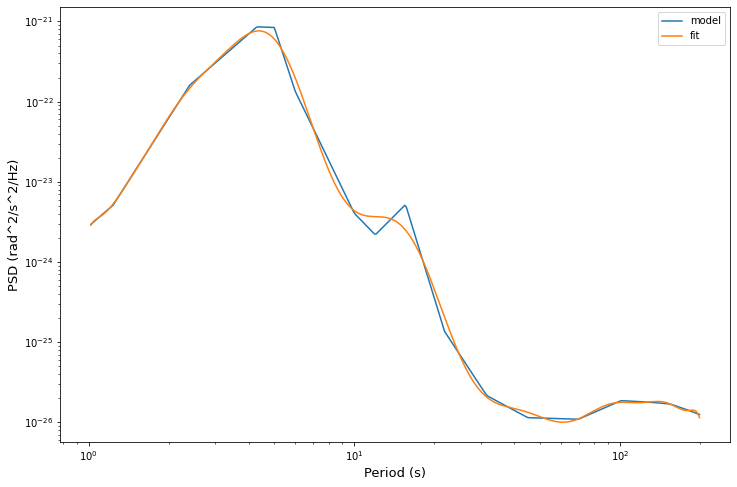

In [4]:
plt.figure(figsize=(12,8))

plt.loglog(model['period'], model['rlnm_psd_median'], label="model")
plt.loglog(model['period'], poly_rlnm, label="fit")

plt.legend()
plt.xlabel("Period (s)", fontsize=13)
plt.ylabel("PSD (rad^2/s^2/Hz)", fontsize=13)

plt.show();

## Storing

In [5]:
## define dictionary with information
out = {}

out['periods'] = model['period']
out['degrees'] = degrees
out['rlnm_poly'] = poly_rlnm
out['coefficients'] = coefficients

## store dictionary as pickle file
pd.to_pickle(out, path+"rlnm_median_polyfit.pkl")